**Brian Blaylock**  
*February 22, 2021*

# 🧩 HRRR in Zarr Format

Selections of the HRRR archive are made availabe in [Zarr](https://zarr.readthedocs.io/en/stable/) format on [AWS](https://registry.opendata.aws/noaa-hrrr-pds/).

In [16]:
import zarr
import fsspec
import xarray as xr

In [45]:
url = 's3://hrrrzarr/sfc/20200903/20200903_00z_anl.zarr/2m_above_ground/TMP/2m_above_ground/'

ds = xr.open_zarr(fsspec.get_mapper(url, anon=True))
ds

<xarray.Dataset>
Dimensions:  (projection_x_coordinate: 1799, projection_y_coordinate: 1059)
Dimensions without coordinates: projection_x_coordinate, projection_y_coordinate
Data variables:
    TMP      (projection_y_coordinate, projection_x_coordinate) float16 dask.array<chunksize=(150, 150), meta=np.ndarray>

## The full variable (all chunks)

In [46]:
ds.TMP

<xarray.DataArray 'TMP' (projection_y_coordinate: 1059, projection_x_coordinate: 1799)>
dask.array<xarray-TMP, shape=(1059, 1799), dtype=float16, chunksize=(150, 150), chunktype=numpy.ndarray>
Dimensions without coordinates: projection_y_coordinate, projection_x_coordinate
Attributes:
    GRIB_PARAM:   [2, 0, 0, 0]
    coordinates:  forecast_reference_time time pressure height forecast_period
    long_name:    2m_above_ground/TMP
    units:        K

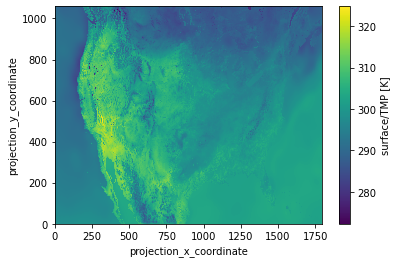

In [35]:
ds.TMP.plot()

## Part of the variable; Western United States

In [56]:
ds.TMP[:, :500]

<xarray.DataArray 'TMP' (projection_y_coordinate: 1059, projection_x_coordinate: 500)>
dask.array<getitem, shape=(1059, 500), dtype=float16, chunksize=(150, 150), chunktype=numpy.ndarray>
Dimensions without coordinates: projection_y_coordinate, projection_x_coordinate
Attributes:
    GRIB_PARAM:   [2, 0, 0, 0]
    coordinates:  forecast_reference_time time pressure height forecast_period
    long_name:    2m_above_ground/TMP
    units:        K

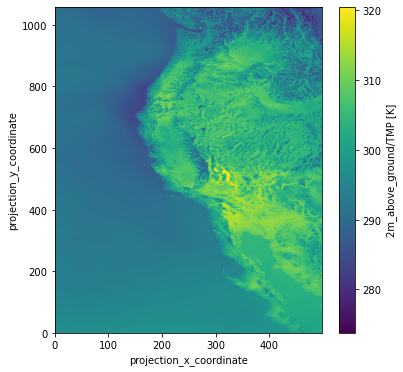

In [58]:
ds.TMP[:, :500].plot(figsize=(6,6))